### LONDON HOUSING DATASET ANALYSIS

In [1]:
import pandas as pd
import os
import plotly.express as ex
import plotly.graph_objects as go

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("C:\\GIT\\London-Housing\\data\\London Housing.csv")

In [3]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [4]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [5]:
df.shape

(13549, 6)

In [6]:
# assuming that null for crime means no crime
# and null for house sold is no house sold
data=df.fillna(0)

In [7]:
data.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
dtype: int64

In [8]:
# we have new dataframe called data that has no null values in it
# from here we will use the new dataframe 'data' for our analysis

In [9]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,0.0
1,2/1/1995,city of london,82203,E09000001,7.0,0.0
2,3/1/1995,city of london,79121,E09000001,14.0,0.0
3,4/1/1995,city of london,77101,E09000001,7.0,0.0
4,5/1/1995,city of london,84409,E09000001,10.0,0.0


In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [12]:
## extracting year, day and month from date column

In [13]:
data['Day'] = data['date'].dt.day
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year

In [14]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Day,Month,Year
0,1995-01-01,city of london,91449,E09000001,17.0,0.0,1,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,0.0,1,2,1995
2,1995-03-01,city of london,79121,E09000001,14.0,0.0,1,3,1995
3,1995-04-01,city of london,77101,E09000001,7.0,0.0,1,4,1995
4,1995-05-01,city of london,84409,E09000001,10.0,0.0,1,5,1995


In [15]:
data = data.drop("date", axis=1)

In [16]:
data.head()

,area,average_price,code,houses_sold,no_of_crimes,Day,Month,Year
0,city of london,91449,E09000001,17.0,0.0,1,1,1995
1,city of london,82203,E09000001,7.0,0.0,1,2,1995
2,city of london,79121,E09000001,14.0,0.0,1,3,1995
3,city of london,77101,E09000001,7.0,0.0,1,4,1995
4,city of london,84409,E09000001,10.0,0.0,1,5,1995


### Find all the records where crime is zero

In [17]:
zero_crime_data = data[data['no_of_crimes'] == 0]

In [18]:
zero_crime_data.head()

,area,average_price,code,houses_sold,no_of_crimes,Day,Month,Year
0,city of london,91449,E09000001,17.0,0.0,1,1,1995
1,city of london,82203,E09000001,7.0,0.0,1,2,1995
2,city of london,79121,E09000001,14.0,0.0,1,3,1995
3,city of london,77101,E09000001,7.0,0.0,1,4,1995
4,city of london,84409,E09000001,10.0,0.0,1,5,1995


In [19]:
zero_crime_data.shape

(6214, 8)

In [20]:
data.shape

(13549, 8)

In [21]:
data['area'].value_counts()

area
hackney                   302
south east                302
enfield                   302
tower hamlets             302
redbridge                 301
richmond upon thames      301
southwark                 301
sutton                    301
waltham forest            301
wandsworth                301
westminster               301
inner london              301
outer london              301
city of london            301
merton                    301
north east                301
north west                301
yorks and the humber      301
east midlands             301
west midlands             301
east of england           301
london                    301
south west                301
newham                    301
kingston upon thames      301
lewisham                  301
lambeth                   301
barnet                    301
bexley                    301
brent                     301
bromley                   301
camden                    301
croydon                   301
ealin

### max and min average price per year in england

In [23]:
england_avg_price = df[df['area'] == 'england'].groupby('area')['average_price'].mean()

In [ ]:
england_avg_price

area
england    153068.843854
Name: average_price, dtype: float64

In [30]:
df1 = data[data['area'] == 'england']

In [31]:
df1.head()

,area,average_price,code,houses_sold,no_of_crimes,Day,Month,Year
13248,england,53203,E92000001,47639.0,0.0,1,1,1995
13249,england,53096,E92000001,47880.0,0.0,1,2,1995
13250,england,53201,E92000001,67025.0,0.0,1,3,1995
13251,england,53591,E92000001,56925.0,0.0,1,4,1995
13252,england,53678,E92000001,64192.0,0.0,1,5,1995


In [32]:
df1['average_price'].min()

52333

In [33]:
df1['average_price'].max()

250410

<Axes: xlabel='Year'>

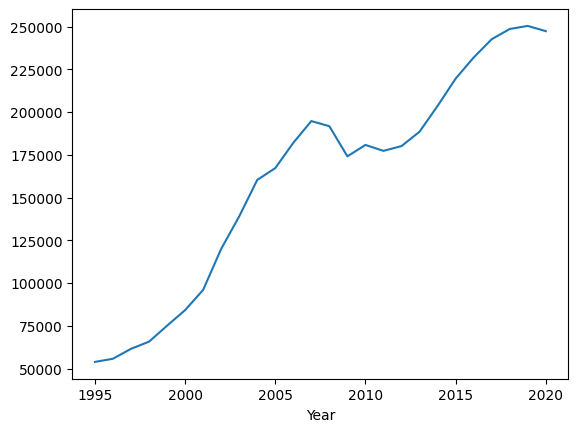

In [35]:
df1.groupby('Year').average_price.max().plot()

<Axes: xlabel='Year'>

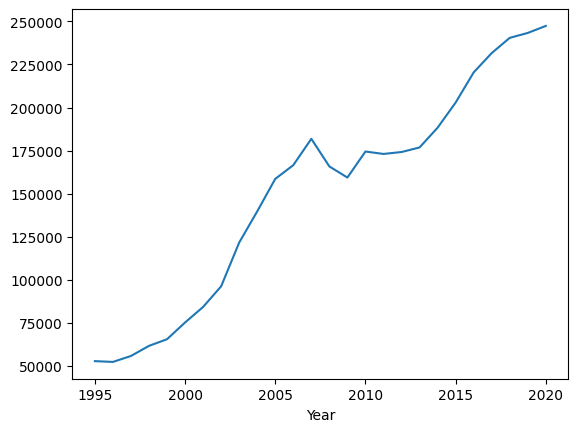

In [36]:
df1.groupby('Year').average_price.min().plot()

<Axes: xlabel='Year'>

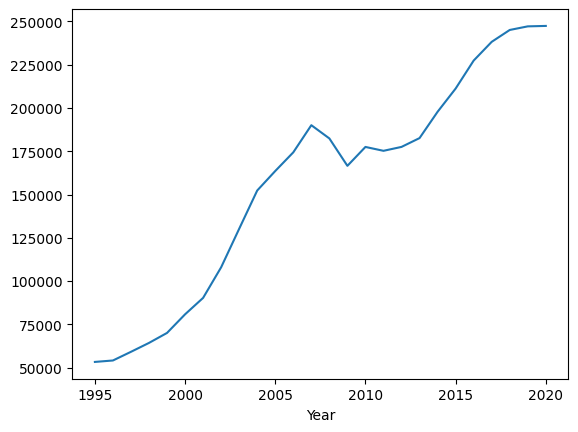

In [37]:
df1.groupby('Year').average_price.mean().plot()

### min and max crime per area

In [39]:
data.head()

,area,average_price,code,houses_sold,no_of_crimes,Day,Month,Year
0,city of london,91449,E09000001,17.0,0.0,1,1,1995
1,city of london,82203,E09000001,7.0,0.0,1,2,1995
2,city of london,79121,E09000001,14.0,0.0,1,3,1995
3,city of london,77101,E09000001,7.0,0.0,1,4,1995
4,city of london,84409,E09000001,10.0,0.0,1,5,1995


<Axes: xlabel='area'>

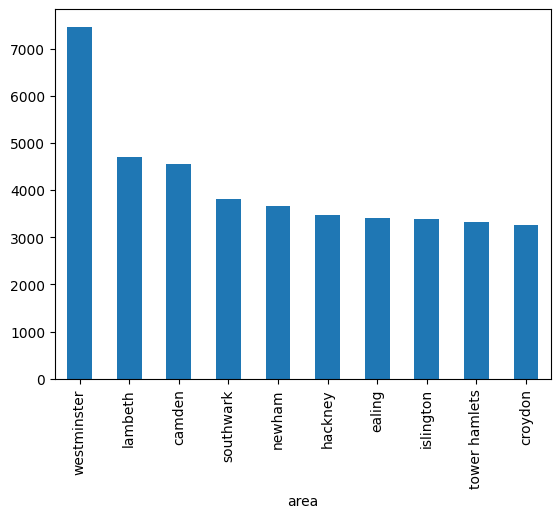

In [40]:
data.groupby('area').no_of_crimes.max().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='area'>

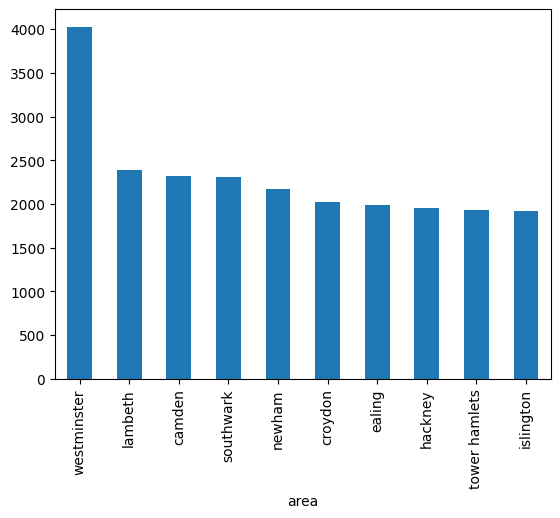

In [42]:
data.groupby('area').no_of_crimes.mean().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [43]:
data.head()

,area,average_price,code,houses_sold,no_of_crimes,Day,Month,Year
0,city of london,91449,E09000001,17.0,0.0,1,1,1995
1,city of london,82203,E09000001,7.0,0.0,1,2,1995
2,city of london,79121,E09000001,14.0,0.0,1,3,1995
3,city of london,77101,E09000001,7.0,0.0,1,4,1995
4,city of london,84409,E09000001,10.0,0.0,1,5,1995
